In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Bank Customer Churn Prediction.csv')

print(df)

      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

In [3]:
X=df.iloc[:,1:11]
Y = df.iloc[: ,11:12]
print("x", X.head())
print("Y",Y.head())

x    credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  
0            1              1         101348.88  
1            0              1         112542.58  
2            1              0         113931.57  
3            0              0          93826.63  
4            1              1          79084.10  
Y    churn
0      1
1      0
2      1
3      0
4      0


In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df is the DataFrame with 'country' and 'gender' columns
encoder = OneHotEncoder(sparse=False)

# Apply the encoder to the 'country' and 'gender' columns
encoded = encoder.fit_transform(X[['country', 'gender']])

# Convert to DataFrame for better understanding
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['country', 'gender']))

# Combine with the original DataFrame and drop the original 'country' and 'gender' columns
df_encoded = pd.concat([X, encoded_df], axis=1).drop(['country', 'gender'], axis=1)

print(df_encoded)

      credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary  country_France  country_Germany  \
0            

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
print(df_encoded)
mean_credit_score = df_encoded['credit_score'].mean()
std_dev_credit_score = df_encoded['credit_score'].std()

mean_age = df_encoded['age'].mean()
std_dev_age = df_encoded['age'].std()

mean_balance = df_encoded['balance'].mean()
std_dev_balance = df_encoded['balance'].std()

mean_estimated_salary = df_encoded['estimated_salary'].mean()
std_dev_estimated_salary = df_encoded['estimated_salary'].std()

# Apply zero-mean normalization
df_encoded['age'] = (df_encoded['age'] - mean_age) / std_dev_age
df_encoded['credit_score'] = (df_encoded['credit_score'] - mean_credit_score) / std_dev_credit_score
df_encoded['balance'] = (df_encoded['balance'] - mean_balance) / std_dev_balance
df_encoded['estimated_salary'] = (df_encoded['estimated_salary'] - mean_estimated_salary) / std_dev_estimated_salary


print(df_encoded)

      credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary  country_France  country_Germany  \
0            

In [6]:
print(df_encoded.describe())

       credit_score           age        tenure       balance  \
count  1.000000e+04  1.000000e+04  10000.000000  1.000000e+04   
mean  -4.838796e-16  2.202682e-16      5.012800 -9.094947e-17   
std    1.000000e+00  1.000000e+00      2.892174  1.000000e+00   
min   -3.109349e+00 -1.994869e+00      0.000000 -1.225786e+00   
25%   -6.883242e-01 -6.599855e-01      3.000000 -1.225786e+00   
50%    1.522142e-02 -1.832414e-01      5.000000  3.319473e-01   
75%    6.980745e-01  4.842004e-01      7.000000  8.198795e-01   
max    2.063781e+00  5.060944e+00     10.000000  2.795184e+00   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      1.000000e+04   
mean          1.530200      0.70550       0.515100     -2.291500e-17   
std           0.581654      0.45584       0.499797      1.000000e+00   
min           1.000000      0.00000       0.000000     -1.740181e+00   
25%           1.000000      0.00000       0.000000    

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded, Y, test_size=0.30)

Training with learning rate = 0.0001, num_epochs = 1000


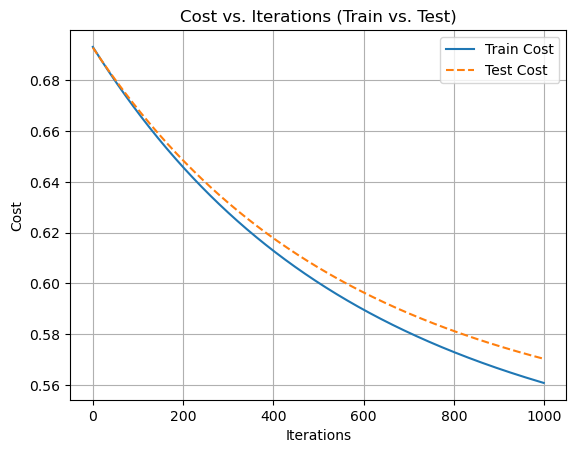

Training with learning rate = 0.0001, num_epochs = 2000


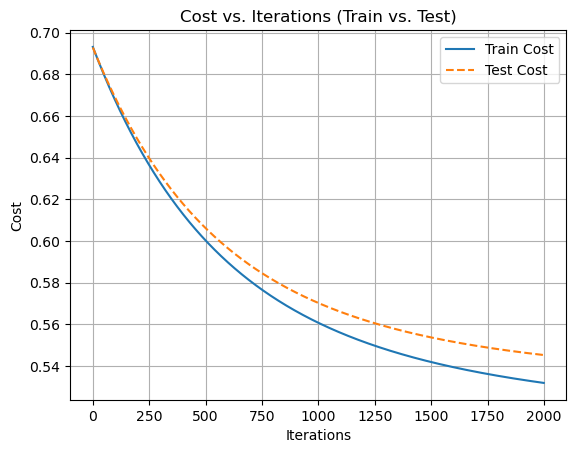

Training with learning rate = 0.0001, num_epochs = 5000


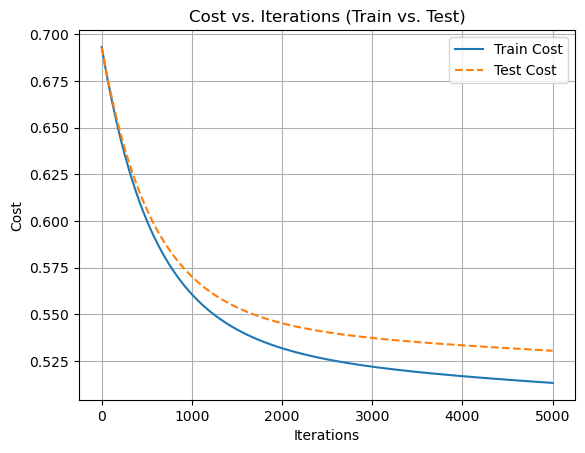

Training with learning rate = 0.001, num_epochs = 1000


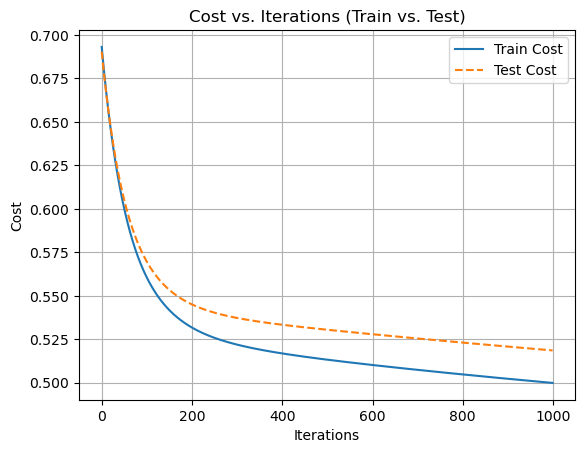

Training with learning rate = 0.001, num_epochs = 2000


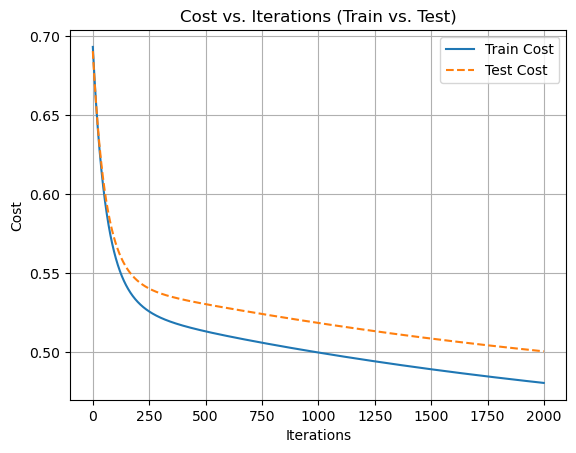

Training with learning rate = 0.001, num_epochs = 5000


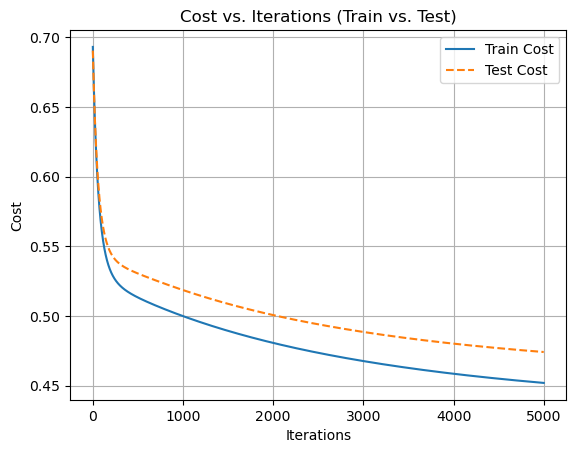

Training with learning rate = 0.01, num_epochs = 1000


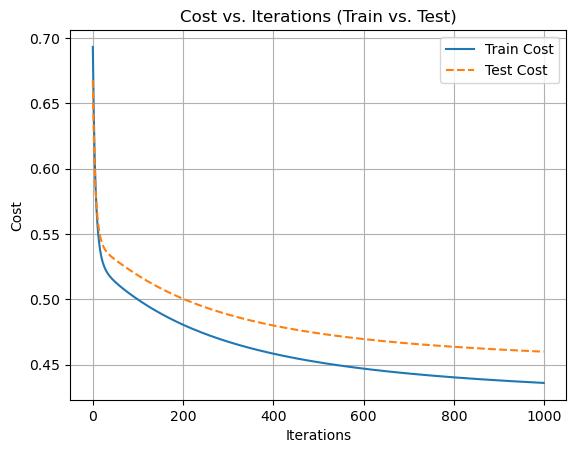

Training with learning rate = 0.01, num_epochs = 2000


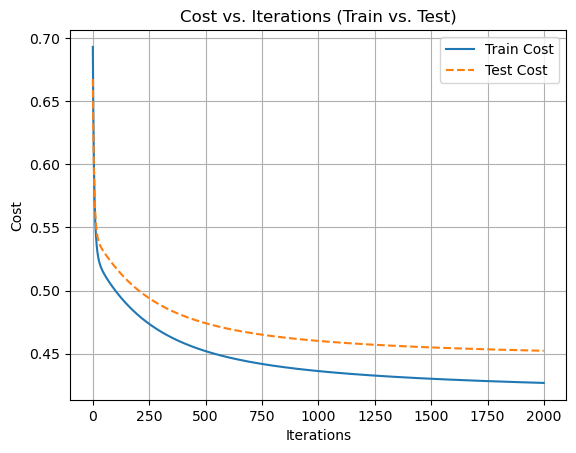

Training with learning rate = 0.01, num_epochs = 5000


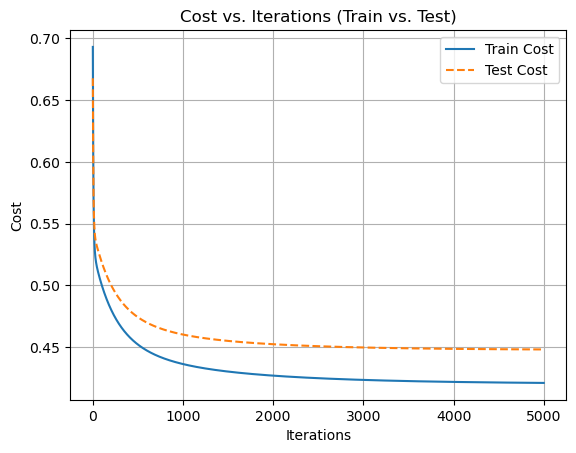

Best Learning Rate: 0.01
Best Num Epochs: 5000
Best Test Cost: 0.4479583657610163


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class GradientDescentLogistic:
    def __init__(self, iterations, learning_rate, train_x, train_y, test_x, test_y):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.w = np.zeros((train_x.shape[1] + 1,1) ) 
        self.train_x = np.array(train_x)  
        self.train_y = np.array(train_y) 
        self.test_x = np.array(test_x)    
        self.test_y = np.array(test_y)     
        self.cost_history = []
        self.test_cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def H_function(self, X):
        return self.sigmoid(np.dot(X.astype(float), self.w))
    
    def cost_find(self, X, Y):
        m = len(Y)
        predictions = self.H_function(X)
        # Binary cross-entropy cost
        cost = -(1/m) * np.sum(Y * np.log(predictions + 1e-15) + (1 - Y) * np.log(1 - predictions + 1e-15))
        return cost

    def direction(self, X, Y):
        m = len(Y)
        predictions = self.H_function(X)
        gradients = (1/m) * np.dot(X.T, (predictions - Y))
        return gradients

    def update_weight(self, gradients):
        self.w -= self.learning_rate * gradients

    def gradient_descent(self):
        # Adding bias term (1s) to the dataset
        train_X_bias = np.c_[np.ones(self.train_x.shape[0]), self.train_x]
        test_X_bias = np.c_[np.ones(self.test_x.shape[0]), self.test_x]

        for i in range(self.iterations):
            # Compute cost for training data
            cost = self.cost_find(train_X_bias, self.train_y)
            self.cost_history.append(cost)

            # Compute gradient
            gradients = self.direction(train_X_bias, self.train_y)

            # Update weights
            self.update_weight(gradients)

            # Compute and store cost for test data
            test_cost = self.cost_find(test_X_bias, self.test_y)
            self.test_cost_history.append(test_cost)

        self.plot_costs()

    def plot_costs(self):
        iterations = range(self.iterations)

        # Plot training cost
        plt.plot(iterations, self.cost_history, label='Train Cost')

        # Plot test cost
        plt.plot(iterations, self.test_cost_history, label='Test Cost', linestyle='--')

        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs. Iterations (Train vs. Test)')
        plt.legend()
        plt.grid()
        plt.show()


# Test different hyperparameters
def test_hyperparameters(X_train, y_train, X_test, y_test):
    learning_rates = [0.0001, 0.001, 0.01]
    num_epochs = [1000, 2000, 5000]

    best_learning_rate = None
    best_num_epochs = None
    best_test_cost = float('inf')

    for lr in learning_rates:
        for epoch in num_epochs:
            print(f"Training with learning rate = {lr}, num_epochs = {epoch}")
            # Initialize and train model
            model = GradientDescentLogistic(epoch, lr, X_train, y_train, X_test, y_test)
            model.gradient_descent()

            # Get the final test cost
            final_test_cost = model.test_cost_history[-1]

            if final_test_cost < best_test_cost:
                best_test_cost = final_test_cost
                best_learning_rate = lr
                best_num_epochs = epoch

    print(f"Best Learning Rate: {best_learning_rate}")
    print(f"Best Num Epochs: {best_num_epochs}")
    print(f"Best Test Cost: {best_test_cost}")

if __name__ == "__main__":
    test_hyperparameters(X_train, y_train, X_test, y_test)
